# final version

Found 10400 images belonging to 26 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 2600 images belonging to 26 classes.
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/90 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step - accuracy: 0.2562 - loss: 2.5767

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


90/90 ━━━━━━━━━━━━━━━━━━━━ 22s 202ms/step - accuracy: 0.2808 - loss: 2.4878 - val_accuracy: 0.8685 - val_loss: 0.4797
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 180ms/step - accuracy: 0.8062 - loss: 0.6043 - val_accuracy: 0.8965 - val_loss: 0.3220
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 184ms/step - accuracy: 0.9080 - loss: 0.2844 - val_accuracy: 0.9008 - val_loss: 0.3071
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 20s 182ms/step - accuracy: 0.9360 - loss: 0.1981 - val_accuracy: 0.9415 - val_loss: 0.2495
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 21s 188ms/step - accuracy: 0.9597 - loss: 0.1335 - val_accuracy: 0.9362 - val_loss: 0.2745
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 184ms/step - accuracy: 0.9673 - loss: 0.1022 - val_accuracy: 0.9335 - val_loss: 0.2911
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 182ms/step - accuracy: 0.9696 - loss: 0.0984 - val_accuracy: 0.9538 - val_loss: 0.2067
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 185ms/step - accuracy: 0.9748 - loss: 0.0821 - val_accuracy: 0.952

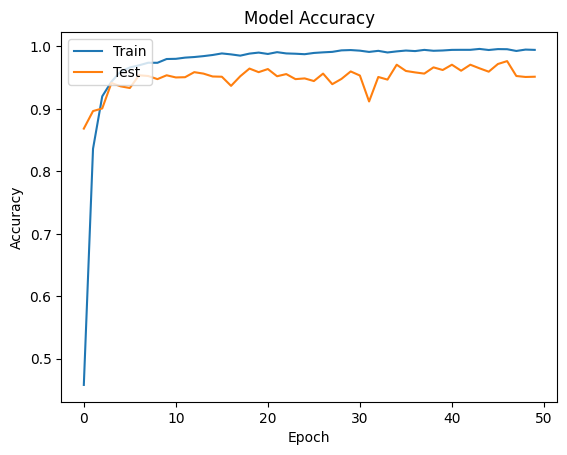

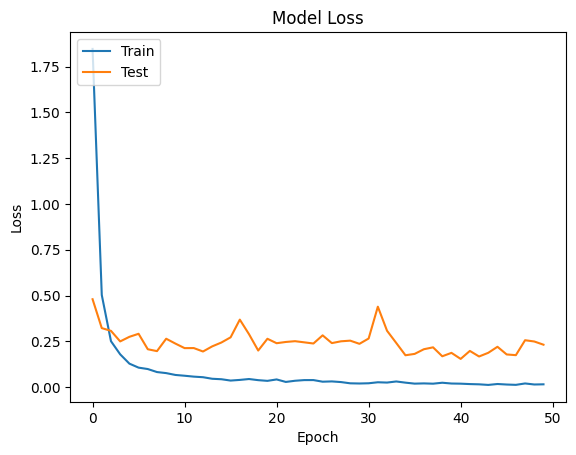

In [35]:
# Part 1 - Building the CNN
#importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import optimizers
# ImageDataGenerator has been moved to tensorflow.keras.preprocessing.image
from tensorflow.keras.preprocessing.image import ImageDataGenerator



# Initializing the CNN
classifier = Sequential()

# Step 1 - Convolution Layer
classifier.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding second convolution layer
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding third convolution layer
classifier.add(Convolution2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full Connection
classifier.add(Dense(256, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(26, activation='softmax'))

# Compiling the CNN
classifier.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Part 2 - Fitting the CNN to the images
# ImageDataGenerator has already been imported at the top
# from tensorflow.keras.preprocessing.image import ImageDataGenerator # This line is no longer needed

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=False
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

training_set = train_datagen.flow_from_directory(
    "/content/newhand/training_set",
    target_size=(64, 64),
    batch_size=128,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    "/content/newhand/test_set",
    target_size=(64, 64),
    batch_size=64,
    class_mode='categorical'
)

model = classifier.fit(
    training_set,
    steps_per_epoch=90,
    epochs=50,
    validation_data=test_set,
    validation_steps=50
)

# Plotting the model accuracy and loss
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [36]:
classifier.save('varshith.h5')